In [70]:
# Imports
import pandas as pd
import csv
import pyarrow.feather as feather
# import dask.dataframe as dd
import polars as pl
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
# import ptitprince as pt
# from jupyter_datatables import init_datatabless_mode

In [9]:
df = pd.read_feather('D:\\datasets\\github_credit_risk_modeling_data\\credit_risk_data.feather')

In [10]:
print(f"feather version of dataset is {len(df):,.0f} rows.")

feather version of dataset is 20,000,000 rows.


In [11]:
df.tail(4)

customer_id  age  gender marital_status  dependents  \
19999996    198009005   33   Other        Married           5   
19999997    198077026   24   Other        Widowed           8   
19999998    198132426   55    Male        Widowed           3   
19999999    198176859   45  Female       Divorced           8   

         employment_status  annual_income  loan_amount  loan_term  \
19999996           Retired         860768       433591         29   
19999997        Unemployed         188682       316900          6   
19999998          Employed         168746       655796          7   
19999999        Unemployed         771875       835011         23   

          interest_rate loan_purpose  loan_to_value_ratio  credit_score  \
19999996          18.41         Home                 0.92           833   
19999997           7.84    Education                 1.40           449   
19999998           3.10          Car                 0.95           677   
19999999          15.27          Car                 1.03           829   

          debt_to_income_ratio  delinquencies  credit_history_length  default  \
19999996                  0.19              2                      7        1   
19999997                  0.30              3                     38        0   
19999998                  0.21              5                     29        0   
19999999                  0.37              2                     19        0   

          default_amount  repayment_tenure  
19999996             815               179  
19999997          367979               154  
19999998          408326                67  
19999999          374057               110

In [14]:
# Downsampling the dataset (e.g., 1% of the data)
df_sample = df.sample(frac=0.01, random_state=42)

In [27]:
# 1. Credit-to-Income Ratio
df_sample['credit_to_income_ratio'] = df_sample['loan_amount'] / df_sample['annual_income']

In [29]:
df_sample.head(2)

customer_id  age gender marital_status  dependents  \
6323247      65888935   36   Male        Widowed           7   
19555084    108276714   56   Male        Married           6   

         employment_status  annual_income  loan_amount  loan_term  \
6323247      Self-employed         625306       396458         11   
19555084           Retired         975232       491779          4   

          interest_rate  ... debt_to_income_ratio  delinquencies  \
6323247            2.76  ...                 0.16              2   
19555084           3.16  ...                 0.16              7   

          credit_history_length  default  default_amount  repayment_tenure  \
6323247                      26        0          660502               105   
19555084                     20        0          745576               135   

          age_quantile  log_loan_amount  age_income_interaction  \
6323247             Q2        12.890328                22511016   
19555084            Q3        13.105787                54612992   

         credit_to_income_ratio  
6323247                0.634022  
19555084               0.504269  

[2 rows x 23 columns]

In [30]:
len(df_sample)

200000

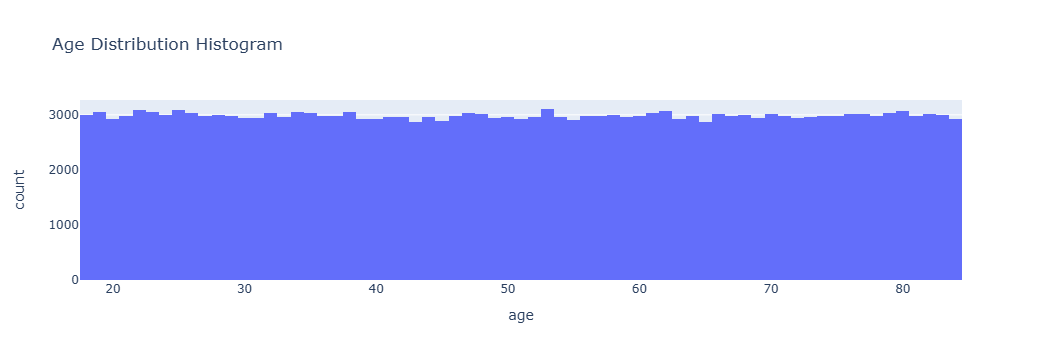

In [34]:
# Create a histogram to visualize the age distribution
fig_hist = px.histogram(df_sample, x='age', nbins=100, title="Age Distribution Histogram")
fig_hist.show()

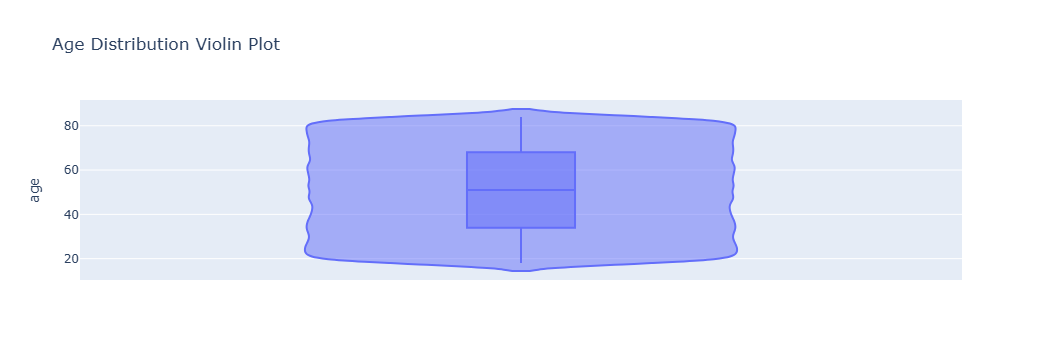

In [35]:
# Create a violin plot to visualize the age distribution
fig_violin = px.violin(df_sample, y='age', box=True, title="Age Distribution Violin Plot")
fig_violin.show()

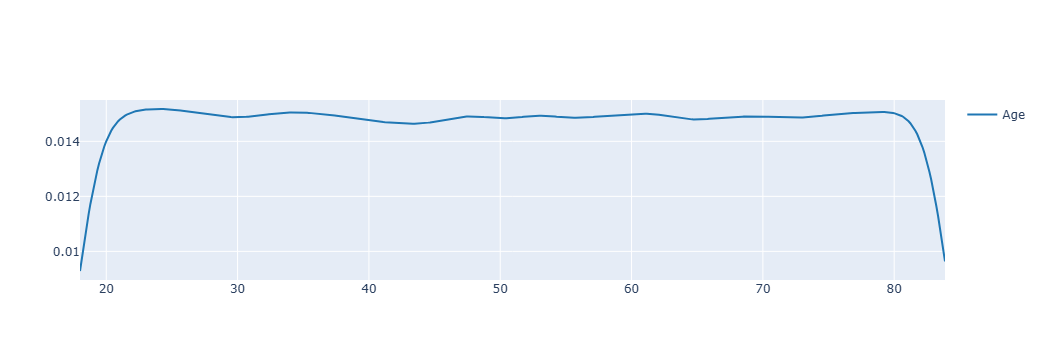

In [36]:
import plotly.figure_factory as ff

# Create a KDE plot for age using the sampled data
fig_kde = ff.create_distplot([df_sample['age']], ['Age'], show_hist=False, show_rug=False)
fig_kde.show()

In [37]:
# Divide the dataset into 4 quantile-based age groups
df_sample['age_quantile'] = pd.qcut(df_sample['age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
# Q1 (51,100 rows): This represents the youngest 25% of the population in your dataset
# Q2 (50,361 rows): This represents the next 25% of the population
# Q3 (50,703 rows): This represents the third 25% of the population
# Q4 (47,836 rows): This represents the oldest 25% of the population

# Check the distribution of the quantile-based bins
print(df_sample['age_quantile'].value_counts())

age_quantile
Q1    51100
Q3    50703
Q2    50361
Q4    47836
Name: count, dtype: int64


In [39]:
df_sample.head(2)

customer_id  age gender marital_status  dependents  \
6323247      65888935   36   Male        Widowed           7   
19555084    108276714   56   Male        Married           6   

         employment_status  annual_income  loan_amount  loan_term  \
6323247      Self-employed         625306       396458         11   
19555084           Retired         975232       491779          4   

          interest_rate  ... debt_to_income_ratio  delinquencies  \
6323247            2.76  ...                 0.16              2   
19555084           3.16  ...                 0.16              7   

          credit_history_length  default  default_amount  repayment_tenure  \
6323247                      26        0          660502               105   
19555084                     20        0          745576               135   

          age_quantile  log_loan_amount  age_income_interaction  \
6323247             Q2        12.890328                22511016   
19555084            Q3        13.105787                54612992   

         credit_to_income_ratio  
6323247                0.634022  
19555084               0.504269  

[2 rows x 23 columns]

In [40]:
df_sample['log_loan_amount'] = np.log1p(df_sample['loan_amount'])  # log1p is log(1 + x), handles 0s

In [42]:
df_sample.head(2)

customer_id  age gender marital_status  dependents  \
6323247      65888935   36   Male        Widowed           7   
19555084    108276714   56   Male        Married           6   

         employment_status  annual_income  loan_amount  loan_term  \
6323247      Self-employed         625306       396458         11   
19555084           Retired         975232       491779          4   

          interest_rate  ... debt_to_income_ratio  delinquencies  \
6323247            2.76  ...                 0.16              2   
19555084           3.16  ...                 0.16              7   

          credit_history_length  default  default_amount  repayment_tenure  \
6323247                      26        0          660502               105   
19555084                     20        0          745576               135   

          age_quantile  log_loan_amount  age_income_interaction  \
6323247             Q2        12.890328                22511016   
19555084            Q3        13.105787                54612992   

         credit_to_income_ratio  
6323247                0.634022  
19555084               0.504269  

[2 rows x 23 columns]

In [43]:
# Interaction terms
df_sample['age_income_interaction'] = df_sample['age'] * df_sample['annual_income']

In [44]:
df_sample.head(3)

customer_id  age gender marital_status  dependents  \
6323247      65888935   36   Male        Widowed           7   
19555084    108276714   56   Male        Married           6   
831796        8672065   61  Other       Divorced           7   

         employment_status  annual_income  loan_amount  loan_term  \
6323247      Self-employed         625306       396458         11   
19555084           Retired         975232       491779          4   
831796          Unemployed         968888        79527         23   

          interest_rate  ... debt_to_income_ratio  delinquencies  \
6323247            2.76  ...                 0.16              2   
19555084           3.16  ...                 0.16              7   
831796            16.07  ...                 0.04              7   

          credit_history_length  default  default_amount  repayment_tenure  \
6323247                      26        0          660502               105   
19555084                     20        0          745576               135   
831796                       25        1          387614               123   

          age_quantile  log_loan_amount  age_income_interaction  \
6323247             Q2        12.890328                22511016   
19555084            Q3        13.105787                54612992   
831796              Q3        11.283864                59102168   

         credit_to_income_ratio  
6323247                0.634022  
19555084               0.504269  
831796                 0.082081  

[3 rows x 23 columns]

In [45]:
# scaling for certain features
scaler = StandardScaler()
df_sample[['age', 'annual_income', 'loan_amount', 'credit_to_income_ratio', 'loan_term', 'loan_to_value_ratio', 'debt_to_income_ratio']] = scaler.fit_transform(
    df_sample[['age', 'annual_income', 'loan_amount', 'credit_to_income_ratio', 'loan_term', 'loan_to_value_ratio', 'debt_to_income_ratio']]
)

In [47]:
df_sample.head(2)

customer_id       age gender marital_status  dependents  \
6323247      65888935 -0.772633   Male        Widowed           7   
19555084    108276714  0.259500   Male        Married           6   

         employment_status  annual_income  loan_amount  loan_term  \
6323247      Self-employed       0.408327    -0.365752  -0.480873   
19555084           Retired       1.643252    -0.034104  -1.318887   

          interest_rate  ... debt_to_income_ratio  delinquencies  \
6323247            2.76  ...            -0.670407              2   
19555084           3.16  ...            -0.670407              7   

          credit_history_length  default  default_amount  repayment_tenure  \
6323247                      26        0          660502               105   
19555084                     20        0          745576               135   

          age_quantile  log_loan_amount  age_income_interaction  \
6323247             Q2        12.890328                22511016   
19555084            Q3        13.105787                54612992   

         credit_to_income_ratio  
6323247               -0.385342  
19555084              -0.421848  

[2 rows x 23 columns]

In [48]:
# Function to reassign 'other' values randomly to 'male' or 'female'
def reassign_gender(gender):
    if gender == 'Other':
        return np.random.choice(['Male', 'Female'])
    else:
        return gender

# Apply the function to the 'gender' column
df_sample['gender'] = df_sample['gender'].apply(reassign_gender)

In [49]:
df_sample.value_counts(['gender'])

gender
Male      100040
Female     99960
Name: count, dtype: int64

In [50]:
# One-hot encoding the categorical columns in dataset
df_sample = pd.get_dummies(df_sample, columns=['gender', 'marital_status', 'employment_status', 'loan_purpose'])

In [51]:
df_sample.columns

Index(['customer_id', 'age', 'dependents', 'annual_income', 'loan_amount',
       'loan_term', 'interest_rate', 'loan_to_value_ratio', 'credit_score',
       'debt_to_income_ratio', 'delinquencies', 'credit_history_length',
       'default', 'default_amount', 'repayment_tenure', 'age_quantile',
       'log_loan_amount', 'age_income_interaction', 'credit_to_income_ratio',
       'gender_Female', 'gender_Male', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'marital_status_Widowed', 'employment_status_Employed',
       'employment_status_Retired', 'employment_status_Self-employed',
       'employment_status_Unemployed', 'loan_purpose_Business',
       'loan_purpose_Car', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal'],
      dtype='object')

In [52]:
len(df_sample.columns)

34

In [53]:
df_sample.head(2)

customer_id       age  dependents  annual_income  loan_amount  \
6323247      65888935 -0.772633           7       0.408327    -0.365752   
19555084    108276714  0.259500           6       1.643252    -0.034104   

          loan_term  interest_rate  loan_to_value_ratio  credit_score  \
6323247   -0.480873           2.76             0.378150           303   
19555084  -1.318887           3.16             1.313422           675   

          debt_to_income_ratio  ...  marital_status_Widowed  \
6323247              -0.670407  ...                    True   
19555084             -0.670407  ...                   False   

          employment_status_Employed  employment_status_Retired  \
6323247                        False                      False   
19555084                       False                       True   

          employment_status_Self-employed  employment_status_Unemployed  \
6323247                              True                         False   
19555084                            False                         False   

         loan_purpose_Business  loan_purpose_Car  loan_purpose_Education  \
6323247                  False             False                   False   
19555084                 False             False                   False   

          loan_purpose_Home  loan_purpose_Personal  
6323247                True                  False  
19555084               True                  False  

[2 rows x 34 columns]

<Axes: >

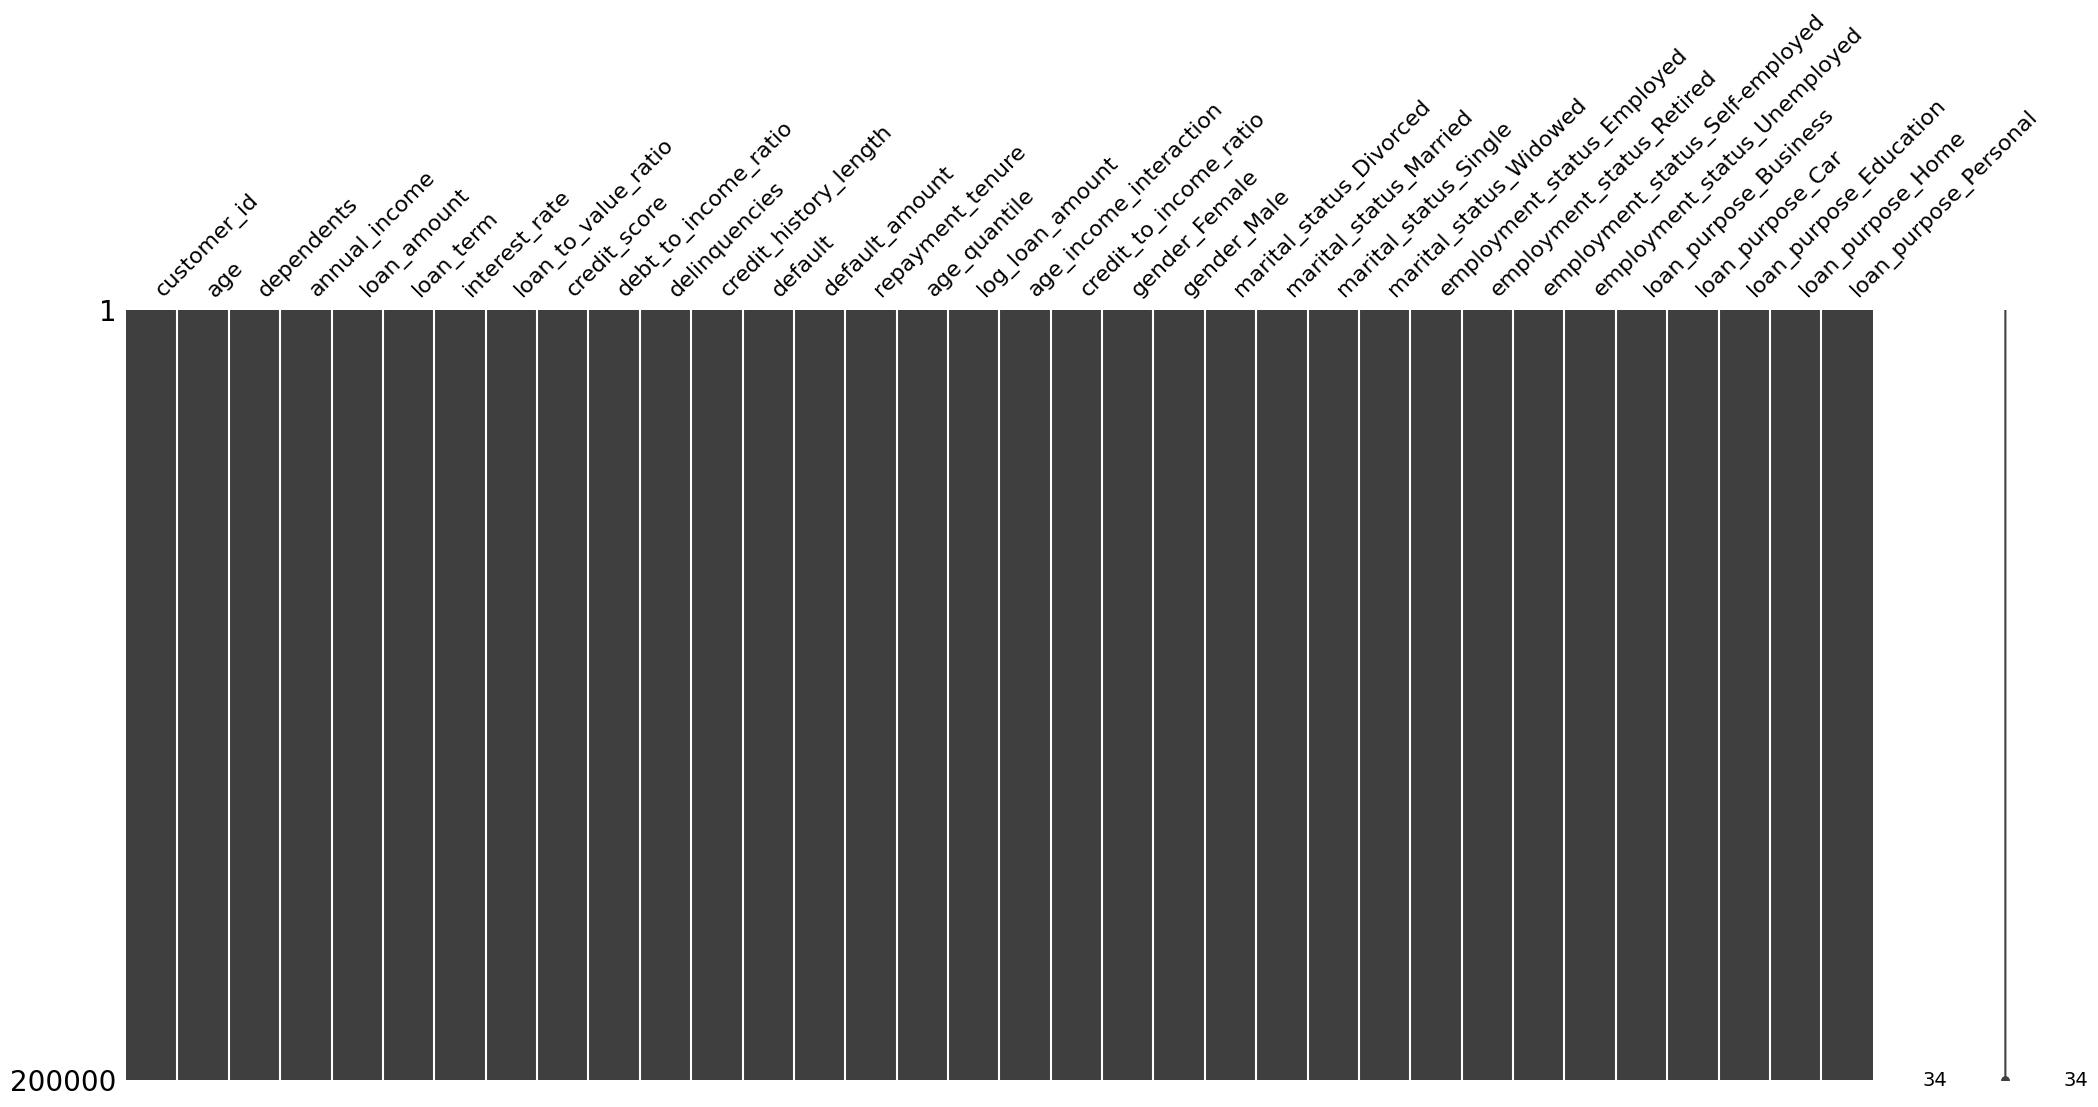

In [54]:
import missingno as msno

# Visualize missing data
msno.matrix(df_sample)


In [55]:
total_missing = df_sample.isnull().sum().sum()

print(f"Total missing values: {total_missing}")

Total missing values: 0


In [56]:
# Check distribution of the target variable (assuming your target column is 'default')
default_distribution = df_sample['default'].value_counts(normalize=True)

print("Distribution of Default Classes:")
print(default_distribution)

Distribution of Default Classes:
default
0    0.501505
1    0.498495
Name: proportion, dtype: float64


In [58]:
df_sample.head(2)

customer_id       age  dependents  annual_income  loan_amount  \
6323247      65888935 -0.772633           7       0.408327    -0.365752   
19555084    108276714  0.259500           6       1.643252    -0.034104   

          loan_term  interest_rate  loan_to_value_ratio  credit_score  \
6323247   -0.480873           2.76             0.378150           303   
19555084  -1.318887           3.16             1.313422           675   

          debt_to_income_ratio  ...  marital_status_Widowed  \
6323247              -0.670407  ...                    True   
19555084             -0.670407  ...                   False   

          employment_status_Employed  employment_status_Retired  \
6323247                        False                      False   
19555084                       False                       True   

          employment_status_Self-employed  employment_status_Unemployed  \
6323247                              True                         False   
19555084                            False                         False   

         loan_purpose_Business  loan_purpose_Car  loan_purpose_Education  \
6323247                  False             False                   False   
19555084                 False             False                   False   

          loan_purpose_Home  loan_purpose_Personal  
6323247                True                  False  
19555084               True                  False  

[2 rows x 34 columns]

In [60]:
# List non-numeric columns
non_numeric_cols = df_sample.select_dtypes(exclude=[np.number]).columns
print("Non-Numeric Columns:", non_numeric_cols)

Non-Numeric Columns: Index(['age_quantile', 'gender_Female', 'gender_Male',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Widowed',
       'employment_status_Employed', 'employment_status_Retired',
       'employment_status_Self-employed', 'employment_status_Unemployed',
       'loan_purpose_Business', 'loan_purpose_Car', 'loan_purpose_Education',
       'loan_purpose_Home', 'loan_purpose_Personal'],
      dtype='object')


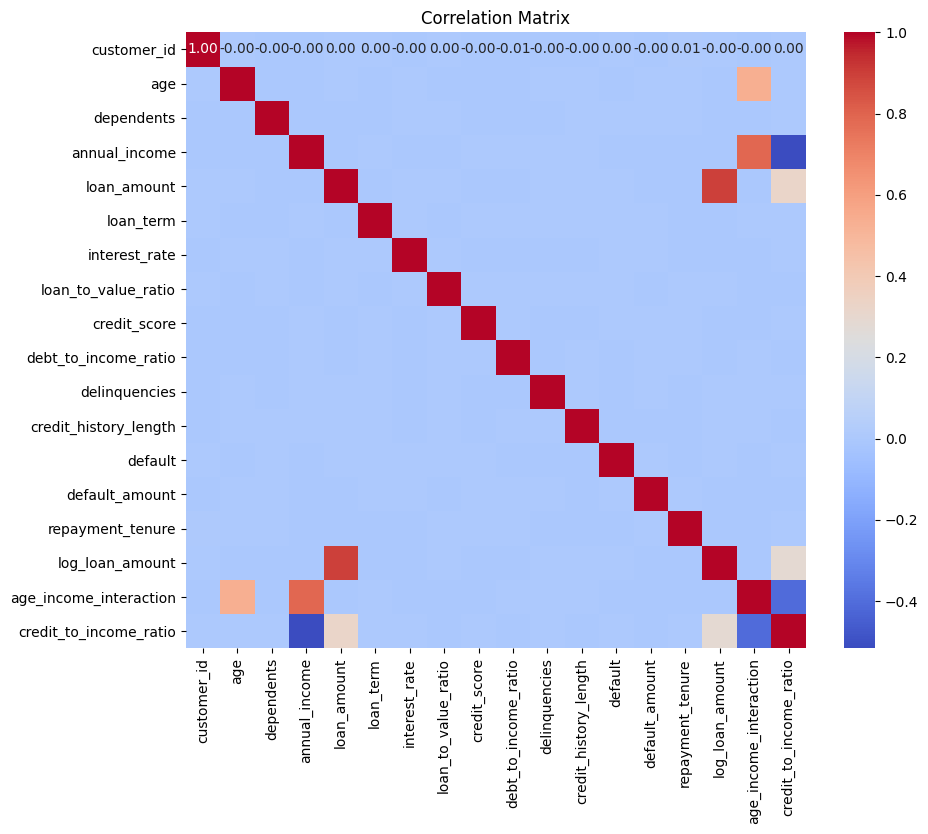

In [61]:
# Select only the numeric columns
numeric_df = df_sample.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [62]:
# Check correlation with the target variable (assuming 'default' is numeric)
target_correlation = correlation_matrix['default'].sort_values(ascending=False)

print("Correlation with Default:")
print(target_correlation)

Correlation with Default:
default                   1.000000
credit_to_income_ratio    0.004004
loan_amount               0.002836
dependents                0.002817
interest_rate             0.002515
loan_to_value_ratio       0.002466
loan_term                 0.001427
log_loan_amount           0.001359
credit_score              0.000936
default_amount            0.000133
customer_id               0.000096
delinquencies            -0.000999
debt_to_income_ratio     -0.001010
repayment_tenure         -0.001134
annual_income            -0.002799
credit_history_length    -0.003038
age                      -0.005015
age_income_interaction   -0.005988
Name: default, dtype: float64


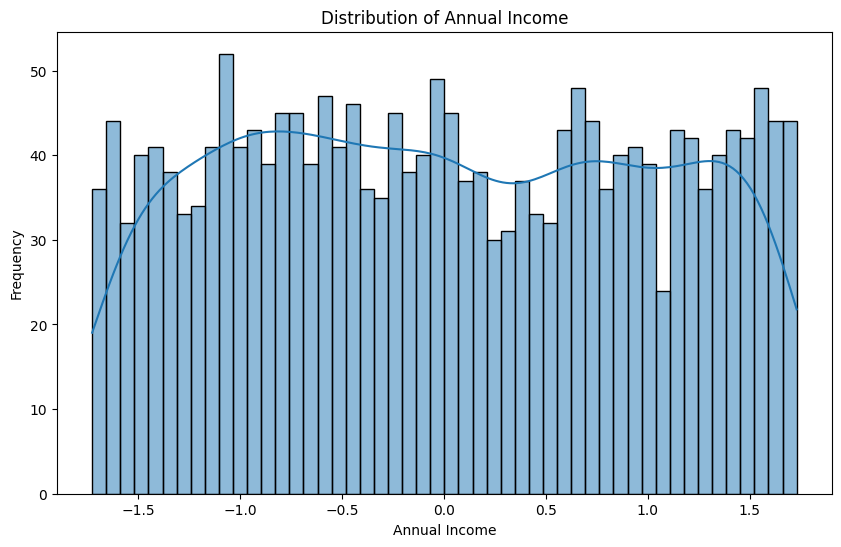

In [64]:
# Downsample the data for visualization (e.g., 1% of the data)
df_sample_downsampled = df_sample.sample(frac=0.01, random_state=42) # sampleception

# Plot the distribution of annual income
plt.figure(figsize=(10, 6))
sns.histplot(df_sample_downsampled['annual_income'], bins=50, kde=True)
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

In [67]:
df_sample.head(2)

customer_id       age  dependents  annual_income  loan_amount  \
6323247      65888935 -0.772633           7       0.408327    -0.365752   
19555084    108276714  0.259500           6       1.643252    -0.034104   

          loan_term  interest_rate  loan_to_value_ratio  credit_score  \
6323247   -0.480873           2.76             0.378150           303   
19555084  -1.318887           3.16             1.313422           675   

          debt_to_income_ratio  ...  marital_status_Widowed  \
6323247              -0.670407  ...                    True   
19555084             -0.670407  ...                   False   

          employment_status_Employed  employment_status_Retired  \
6323247                        False                      False   
19555084                       False                       True   

          employment_status_Self-employed  employment_status_Unemployed  \
6323247                              True                         False   
19555084                            False                         False   

         loan_purpose_Business  loan_purpose_Car  loan_purpose_Education  \
6323247                  False             False                   False   
19555084                 False             False                   False   

          loan_purpose_Home  loan_purpose_Personal  
6323247                True                  False  
19555084               True                  False  

[2 rows x 34 columns]

In [72]:
# Segment the debt_to_income_ratio into categories (if not already present)
df_sample['dti_bracket'] = pd.cut(df_sample['debt_to_income_ratio'],
                                  bins=[0, 0.2, 0.36, 0.5, np.inf],
                                  labels=['Low', 'Moderate', 'High', 'Very High'])

In [73]:
df_sample.head(3)

customer_id       age  dependents  annual_income  loan_amount  \
6323247      65888935 -0.772633           7       0.408327    -0.365752   
19555084    108276714  0.259500           6       1.643252    -0.034104   
831796        8672065  0.517533           7       1.620864    -1.468444   

          loan_term  interest_rate  loan_to_value_ratio  credit_score  \
6323247   -0.480873           2.76             0.378150           303   
19555084  -1.318887           3.16             1.313422           675   
831796     0.955720          16.07            -0.349284           771   

          debt_to_income_ratio  ...  employment_status_Employed  \
6323247              -0.670407  ...                       False   
19555084             -0.670407  ...                       False   
831796               -1.517263  ...                       False   

          employment_status_Retired  employment_status_Self-employed  \
6323247                       False                             True   
19555084                       True                            False   
831796                        False                            False   

          employment_status_Unemployed  loan_purpose_Business  \
6323247                          False                  False   
19555084                         False                  False   
831796                            True                  False   

         loan_purpose_Car  loan_purpose_Education  loan_purpose_Home  \
6323247             False                   False               True   
19555084            False                   False               True   
831796              False                   False               True   

          loan_purpose_Personal  dti_bracket  
6323247                   False          NaN  
19555084                  False          NaN  
831796                    False          NaN  

[3 rows x 35 columns]

In [74]:
df_sample['dti_bracket'].value_counts()

dti_bracket
Very High    71623
Low          12144
Moderate      8159
High          7955
Name: count, dtype: int64

In [75]:
# Bucketing the credit scores based on standard industry practice
df_sample['credit_score_bucket'] = pd.cut(df_sample['credit_score'],
                                          bins=[300, 579, 669, 739, 799, 850],
                                          labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'],
                                          right=False)

In [76]:
df_sample.tail(5)

customer_id       age  dependents  annual_income  loan_amount  \
10293763    107282748  0.207893           2      -0.841502     1.008776   
10564103    110093584 -1.030666           3       0.913511    -0.121201   
13909598    144944137  0.878780           4      -0.319053     0.936372   
19278490     52004965 -1.598339           6       0.621393    -0.396575   
14598909    152119315 -1.598339           2       0.831615    -1.584405   

          loan_term  interest_rate  loan_to_value_ratio  credit_score  \
10293763   0.237423           3.55            -1.457755           796   
10564103  -1.558319          16.17            -0.626402           659   
13909598  -0.241441           5.88             1.625180           527   
19278490   1.075437           5.06             1.313422           344   
14598909  -0.121725          18.25             1.244143           792   

          debt_to_income_ratio  ...  employment_status_Retired  \
10293763             -0.740978  ...                      False   
10564103             -0.599836  ...                      False   
13909598              0.388164  ...                      False   
19278490              1.093877  ...                      False   
14598909             -1.587835  ...                       True   

          employment_status_Self-employed  employment_status_Unemployed  \
10293763                            False                          True   
10564103                            False                          True   
13909598                             True                         False   
19278490                            False                         False   
14598909                            False                         False   

          loan_purpose_Business  loan_purpose_Car loan_purpose_Education  \
10293763                  False             False                  False   
10564103                  False             False                   True   
13909598                   True             False                  False   
19278490                   True             False                  False   
14598909                  False             False                  False   

          loan_purpose_Home  loan_purpose_Personal  dti_bracket  \
10293763               True                  False          NaN   
10564103              False                  False          NaN   
13909598              False                  False         High   
19278490              False                  False    Very High   
14598909               True                  False          NaN   

          credit_score_bucket  
10293763            Very Good  
10564103                 Fair  
13909598                 Poor  
19278490                 Poor  
14598909            Very Good  

[5 rows x 36 columns]

In [77]:
# Create new interaction terms between key features
df_sample['income_loan_amount_interaction'] = df_sample['annual_income'] * df_sample['loan_amount']
df_sample['credit_score_income_interaction'] = df_sample['credit_score'] * df_sample['annual_income']
df_sample['loan_amount_interest_rate_interaction'] = df_sample['loan_amount'] * df_sample['interest_rate']

In [78]:
df_sample.tail(4)

customer_id       age  dependents  annual_income  loan_amount  \
10564103    110093584 -1.030666           3       0.913511    -0.121201   
13909598    144944137  0.878780           4      -0.319053     0.936372   
19278490     52004965 -1.598339           6       0.621393    -0.396575   
14598909    152119315 -1.598339           2       0.831615    -1.584405   

          loan_term  interest_rate  loan_to_value_ratio  credit_score  \
10564103  -1.558319          16.17            -0.626402           659   
13909598  -0.241441           5.88             1.625180           527   
19278490   1.075437           5.06             1.313422           344   
14598909  -0.121725          18.25             1.244143           792   

          debt_to_income_ratio  ...  loan_purpose_Business  loan_purpose_Car  \
10564103             -0.599836  ...                  False             False   
13909598              0.388164  ...                   True             False   
19278490              1.093877  ...                   True             False   
14598909             -1.587835  ...                  False             False   

          loan_purpose_Education  loan_purpose_Home  loan_purpose_Personal  \
10564103                    True              False                  False   
13909598                   False              False                  False   
19278490                   False              False                  False   
14598909                   False               True                  False   

         dti_bracket  credit_score_bucket  income_loan_amount_interaction  \
10564103         NaN                 Fair                       -0.110718   
13909598        High                 Poor                       -0.298752   
19278490   Very High                 Poor                       -0.246429   
14598909         NaN            Very Good                       -1.317615   

          credit_score_income_interaction  \
10564103                       602.003886   
13909598                      -168.140952   
19278490                       213.759247   
14598909                       658.638940   

          loan_amount_interest_rate_interaction  
10564103                              -1.959816  
13909598                               5.505867  
19278490                              -2.006672  
14598909                             -28.915399  

[4 rows x 39 columns]

In [81]:
# Log transform debt_to_income_ratio if it's skewed and not already log-transformed
# df_sample['log_debt_to_income_ratio'] = np.log1p(df_sample['debt_to_income_ratio'])

In [82]:
# Handle missing values after creating new features, if necessary
# df_sample.fillna(0, inplace=True)

In [83]:
# encode new features
df_sample = pd.get_dummies(df_sample, columns=['dti_bracket', 'credit_score_bucket'], drop_first=True)

In [84]:
df_sample.tail(3)

customer_id       age  dependents  annual_income  loan_amount  \
13909598    144944137  0.878780           4      -0.319053     0.936372   
19278490     52004965 -1.598339           6       0.621393    -0.396575   
14598909    152119315 -1.598339           2       0.831615    -1.584405   

          loan_term  interest_rate  loan_to_value_ratio  credit_score  \
13909598  -0.241441           5.88             1.625180           527   
19278490   1.075437           5.06             1.313422           344   
14598909  -0.121725          18.25             1.244143           792   

          debt_to_income_ratio  ...  credit_score_income_interaction  \
13909598              0.388164  ...                      -168.140952   
19278490              1.093877  ...                       213.759247   
14598909             -1.587835  ...                       658.638940   

          loan_amount_interest_rate_interaction  log_debt_to_income_ratio  \
13909598                               5.505867                  0.327982   
19278490                              -2.006672                  0.739018   
14598909                             -28.915399                       NaN   

          dti_bracket_Moderate  dti_bracket_High dti_bracket_Very High  \
13909598                 False              True                 False   
19278490                 False             False                  True   
14598909                 False             False                 False   

          credit_score_bucket_Fair  credit_score_bucket_Good  \
13909598                     False                     False   
19278490                     False                     False   
14598909                     False                     False   

          credit_score_bucket_Very Good  credit_score_bucket_Excellent  
13909598                          False                          False  
19278490                          False                          False  
14598909                           True                          False  

[3 rows x 45 columns]

## We now go to the model training portion of this project.